### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [ ]:
#juntando as informações das lojas

loja["loja"] = "Loja 1"
loja2["loja"] = "Loja 2"
loja3["loja"] = "Loja 3"
loja4["loja"] = "Loja 4"

df_completo = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

df_completo.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


#1. Análise do faturamento


In [ ]:
faturamento = df_completo.groupby("loja")["Preço"].agg(
    faturamento_total="sum",
    faturamento_médio="mean"
).reset_index()

print(faturamento)



     loja  faturamento_total  faturamento_médio
0  Loja 1         1534509.12         650.491361
1  Loja 2         1488459.06         630.970352
2  Loja 3         1464025.03         620.612560
3  Loja 4         1384497.58         587.149101


In [ ]:
df_completo["Data da Compra	"] = pd.to_datetime(df_completo["Data da Compra	"], dayfirst=True)
df_completo["Ano"] = df_completo["Data da Compra	"].dt.year
faturamento_ano = df_completo.groupby(["loja", "Ano"])["Preço"].agg(
    faturamento_total_ano="sum",
    faturamento_medio_ano="mean"
).reset_index()

print(faturamento_ano)


      loja   Ano  faturamento_total_ano  faturamento_medio_ano
0   Loja 1  2020              491911.51             687.988126
1   Loja 1  2021              482829.91             653.355765
2   Loja 1  2022              422086.24             591.986311
3   Loja 1  2023              137681.46             717.090937
4   Loja 2  2020              427288.25             610.411786
5   Loja 2  2021              468288.89             616.981410
6   Loja 2  2022              477635.56             674.626497
7   Loja 2  2023              115246.36             600.241458
8   Loja 3  2020              428943.09             611.901698
9   Loja 3  2021              483938.91             653.971500
10  Loja 3  2022              467250.70             631.419865
11  Loja 3  2023               83892.33             471.305225
12  Loja 4  2020              441129.52             592.120161
13  Loja 4  2021              463763.27             623.337728
14  Loja 4  2022              402961.23             565

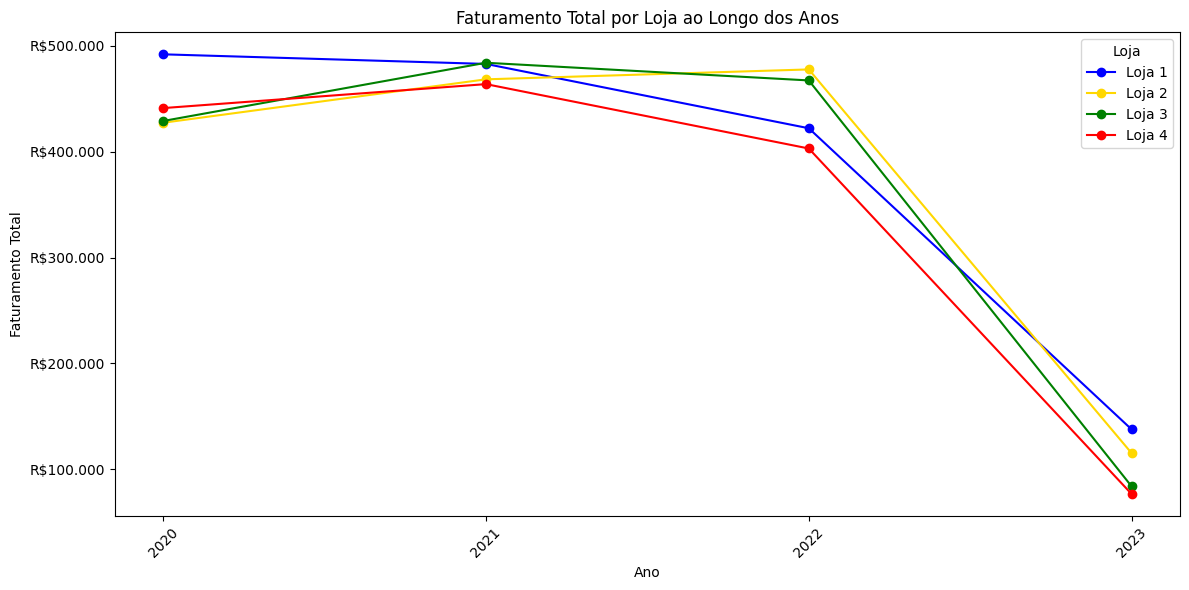

In [ ]:
#grafico do faturamento total
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

faturamento_ano["Ano"] = faturamento_ano["Ano"].astype(int)
faturamento_ano = faturamento_ano.sort_values(by="Ano")

cores_lojas = {
    "Loja 1": "blue",
    "Loja 2": "gold",     # amarelo
    "Loja 3": "green",
    "Loja 4": "red"
}

lojas_ordenadas = sorted(faturamento_ano["loja"].unique())  # Assume que os nomes são strings como "Loja 1", "Loja 2"...
plt.figure(figsize=(12, 6))

for loja in lojas_ordenadas:
    dados_loja_ano = faturamento_ano[faturamento_ano['loja'] == loja]
    cor = cores_lojas.get(loja, "gray")  # cor padrão caso a loja não esteja no dicionário
    plt.plot(dados_loja_ano["Ano"], dados_loja_ano["faturamento_total_ano"], marker='o', label=loja, color=cor)


plt.title("Faturamento Total por Loja ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Faturamento Total")
plt.xticks(sorted(faturamento_ano["Ano"].unique()), rotation=45)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R${x:,.0f}'.replace(',', '.')))
plt.legend(title="Loja")
plt.grid(False)
plt.tight_layout()
plt.show()



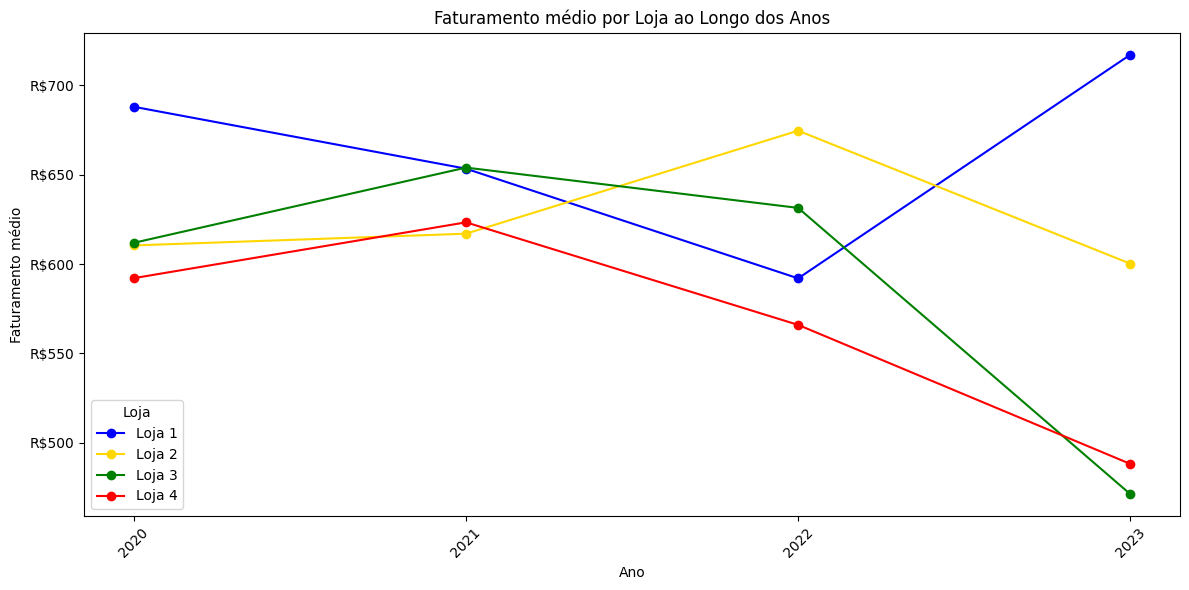

In [ ]:
#grafico do faturamento total
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

faturamento_ano["Ano"] = faturamento_ano["Ano"].astype(int)
faturamento_ano = faturamento_ano.sort_values(by="Ano")

cores_lojas = {
    "Loja 1": "blue",
    "Loja 2": "gold",     # amarelo
    "Loja 3": "green",
    "Loja 4": "red"
}

lojas_ordenadas = sorted(faturamento_ano["loja"].unique())  # Assume que os nomes são strings como "Loja 1", "Loja 2"...
plt.figure(figsize=(12, 6))

for loja in lojas_ordenadas:
    dados_loja_ano = faturamento_ano[faturamento_ano['loja'] == loja]
    cor = cores_lojas.get(loja, "gray")  # cor padrão caso a loja não esteja no dicionário
    plt.plot(dados_loja_ano["Ano"], dados_loja_ano["faturamento_medio_ano"], marker='o', label=loja, color=cor)


plt.title("Faturamento médio por Loja ao Longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Faturamento médio")
plt.xticks(sorted(faturamento_ano["Ano"].unique()), rotation=45)


plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'R${x:,.0f}'.replace(',', '.')))
plt.legend(title="Loja")
plt.grid(False)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [ ]:
categoria = (
    df_completo.groupby(["loja", "Categoria do Produto"])
    .size()
    .reset_index(name="Quantidade")
    .sort_values(["loja", "Quantidade"], ascending=[True, False])
    .drop_duplicates("loja")
)

print(categoria)

produto = (
    df_completo.groupby(["loja", "Produto"])
    .size()
    .reset_index(name="Quantidade")
    .sort_values(["loja", "Quantidade"], ascending=[True, False])
    .drop_duplicates("loja")
)
print(produto)

      loja Categoria do Produto  Quantidade
6   Loja 1               moveis         465
14  Loja 2               moveis         442
22  Loja 3               moveis         499
30  Loja 4               moveis         480
       loja                   Produto  Quantidade
24   Loja 1             Guarda roupas          60
79   Loja 2  Iniciando em programação          65
134  Loja 3             Kit banquetas          57
161  Loja 4                  Cama box          62


In [ ]:
df_completo["Data da Compra"] = pd.to_datetime(df_completo["Data da Compra"], dayfirst=True)
df_completo["Ano"] = df_completo["Data da Compra"].dt.year
quantidade_produtos_vendidos = df_completo.groupby(["loja", "Ano"])["Produto"].count().reset_index(name="quantidade_vendida")

print(quantidade_produtos_vendidos)


      loja   Ano  quantidade_vendida
0   Loja 1  2020                 715
1   Loja 1  2021                 739
2   Loja 1  2022                 713
3   Loja 1  2023                 192
4   Loja 2  2020                 700
5   Loja 2  2021                 759
6   Loja 2  2022                 708
7   Loja 2  2023                 192
8   Loja 3  2020                 701
9   Loja 3  2021                 740
10  Loja 3  2022                 740
11  Loja 3  2023                 178
12  Loja 4  2020                 745
13  Loja 4  2021                 744
14  Loja 4  2022                 712
15  Loja 4  2023                 157


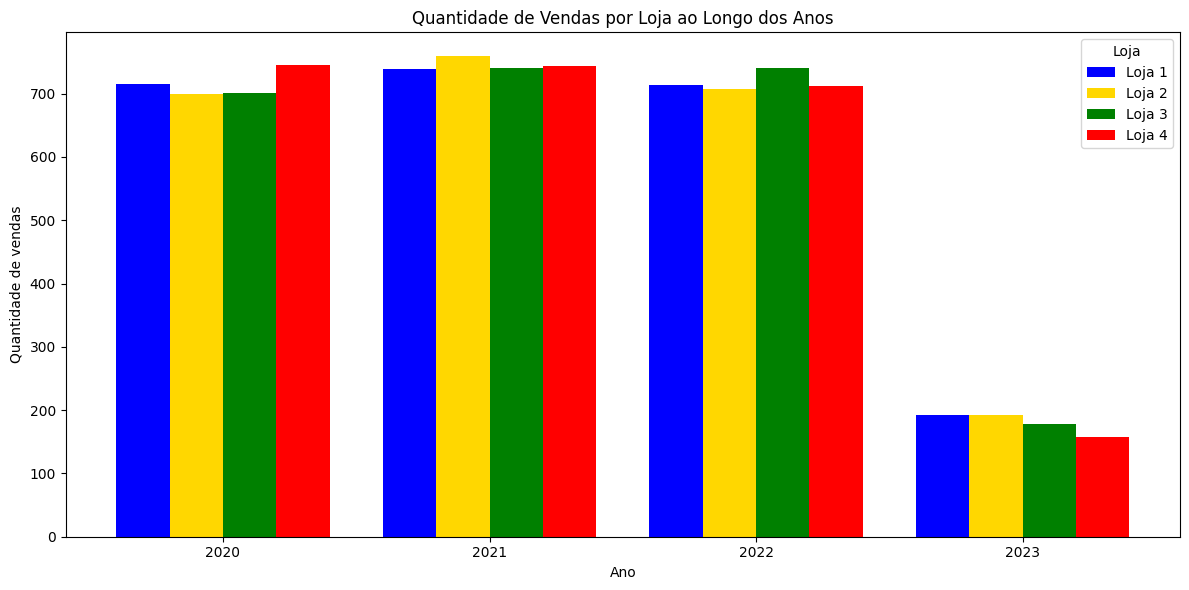

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np


quantidade_produtos_vendidos["Ano"] = quantidade_produtos_vendidos["Ano"].astype(int)
quantidade_produtos_vendidos = quantidade_produtos_vendidos.sort_values(by="Ano")

cores_lojas = {
    "Loja 1": "blue",
    "Loja 2": "gold",
    "Loja 3": "green",
    "Loja 4": "red"
}


anos = sorted(quantidade_produtos_vendidos["Ano"].unique())
lojas_ordenadas = sorted(quantidade_produtos_vendidos["loja"].unique())
largura_barra = 0.2
posicoes_base = np.arange(len(anos))

plt.figure(figsize=(12, 6))

# Para cada loja, desenhar barras deslocadas no eixo X
for i, loja in enumerate(lojas_ordenadas):
    dados_loja = quantidade_produtos_vendidos[quantidade_produtos_vendidos["loja"] == loja]


    dados_loja = dados_loja.set_index("Ano").reindex(anos, fill_value=0).reset_index()

    posicoes = posicoes_base + i * largura_barra
    cor = cores_lojas.get(loja, "gray")
    plt.bar(posicoes, dados_loja["quantidade_vendida"], width=largura_barra, label=loja, color=cor)


plt.xticks(posicoes_base + largura_barra * (len(lojas_ordenadas)-1)/2, anos)
plt.xlabel("Ano")
plt.ylabel("Quantidade de vendas")
plt.title("Quantidade de Vendas por Loja ao Longo dos Anos")
plt.legend(title="Loja")
plt.tight_layout()
plt.grid(False)

plt.show()


In [ ]:
#quantidade de vendas por cidade
df_completo["Data da Compra"] = pd.to_datetime(df_completo["Data da Compra"], dayfirst=True)
df_completo["Ano"] = df_completo["Data da Compra"].dt.year
quantidade_produtos_vendidos = df_completo.groupby(["loja", "Ano", "Local da compra"])["Produto"].count().reset_index(name="quantidade_vendida")

print(quantidade_produtos_vendidos)


       loja   Ano Local da compra  quantidade_vendida
0    Loja 1  2020              AL                   3
1    Loja 1  2020              AP                   1
2    Loja 1  2020              BA                  28
3    Loja 1  2020              CE                   7
4    Loja 1  2020              DF                  22
..      ...   ...             ...                 ...
360  Loja 4  2023              RN                   1
361  Loja 4  2023              RS                  10
362  Loja 4  2023              SC                  13
363  Loja 4  2023              SE                   1
364  Loja 4  2023              SP                  56

[365 rows x 4 columns]


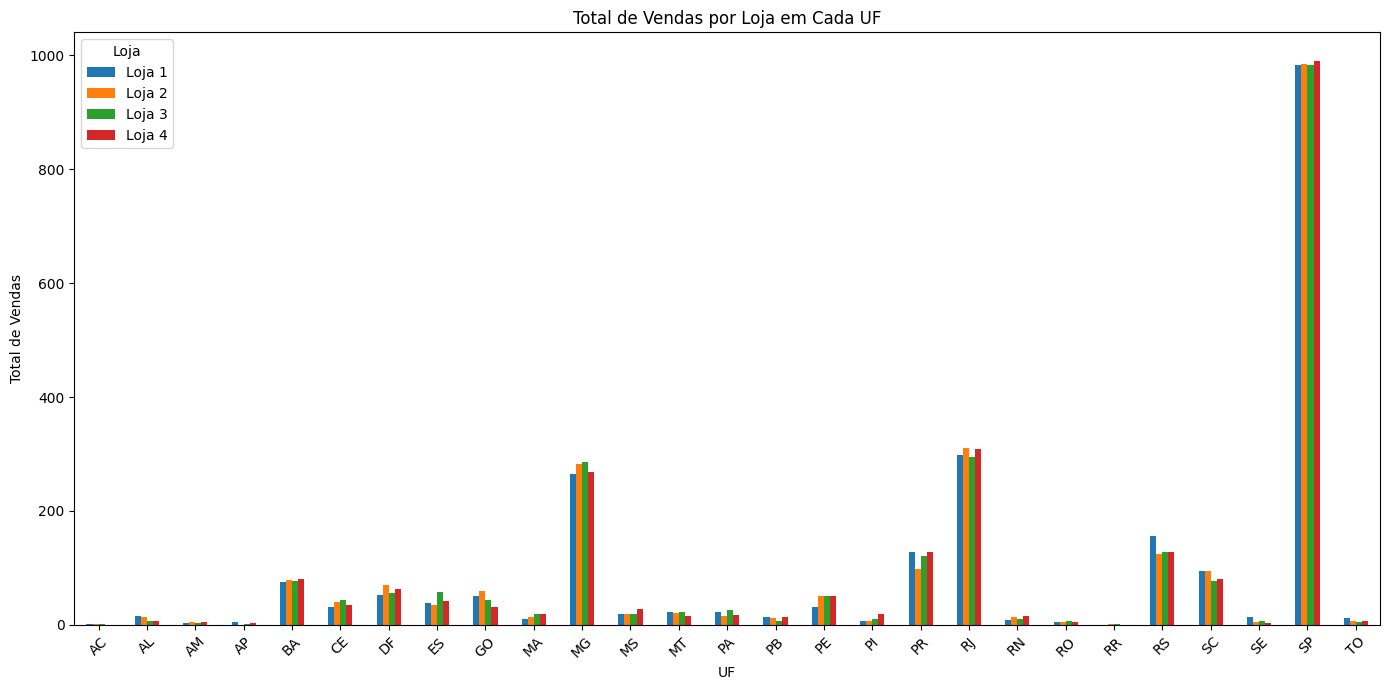

In [ ]:
import matplotlib.pyplot as plt

# Agrupar total de vendas por loja e UF (sem considerar o ano)
total_vendas = df_completo.groupby(["loja", "Local da compra"])["Produto"].count().reset_index(name="total_vendas")

# Criar tabela pivô para o gráfico
pivot = total_vendas.pivot(index="Local da compra", columns="loja", values="total_vendas").fillna(0)

# Plotar gráfico de barras agrupadas
pivot.plot(kind='bar', figsize=(14,7))

plt.title("Total de Vendas por Loja em Cada UF")
plt.xlabel("UF")
plt.ylabel("Total de Vendas")
plt.xticks(rotation=45)
plt.legend(title="Loja")
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [ ]:
df_completo["Data da Compra	"] = pd.to_datetime(df_completo["Data da Compra"], dayfirst=True)
df_completo["Mes"] = df_completo["Data da Compra	"].dt.to_period("M").astype(str)
avaliacao=df_completo.groupby(["loja", "Mes"])["Avaliação da compra"].mean().reset_index()
avaliacao.columns = ["Lojas", "Mes", "Media_avaliacao"]
print(avaliacao)


      Lojas      Mes  Media_avaliacao
0    Loja 1  2020-01         3.830986
1    Loja 1  2020-02         3.645161
2    Loja 1  2020-03         3.887324
3    Loja 1  2020-04         4.000000
4    Loja 1  2020-05         3.758065
..      ...      ...              ...
151  Loja 4  2022-11         3.875000
152  Loja 4  2022-12         4.048387
153  Loja 4  2023-01         4.130435
154  Loja 4  2023-02         3.919355
155  Loja 4  2023-03         4.510204

[156 rows x 3 columns]


In [ ]:
df_completo["Data da Compra	"] = pd.to_datetime(df_completo["Data da Compra	"], dayfirst=True)
df_completo["Ano"] = df_completo["Data da Compra	"].dt.year
avaliacao_ano=df_completo.groupby(["loja", "Ano"])["Avaliação da compra"].mean().reset_index()
avaliacao_ano.columns = ["Lojas", "Ano", "Media_avaliacao"]
print(avaliacao_ano)



     Lojas   Ano  Media_avaliacao
0   Loja 1  2020         3.932867
1   Loja 1  2021         3.960758
2   Loja 1  2022         4.042076
3   Loja 1  2023         3.958333
4   Loja 2  2020         4.041429
5   Loja 2  2021         3.997365
6   Loja 2  2022         4.097458
7   Loja 2  2023         3.958333
8   Loja 3  2020         4.122682
9   Loja 3  2021         3.925676
10  Loja 3  2022         4.093243
11  Loja 3  2023         4.078652
12  Loja 4  2020         4.021477
13  Loja 4  2021         3.959677
14  Loja 4  2022         3.969101
15  Loja 4  2023         4.165605


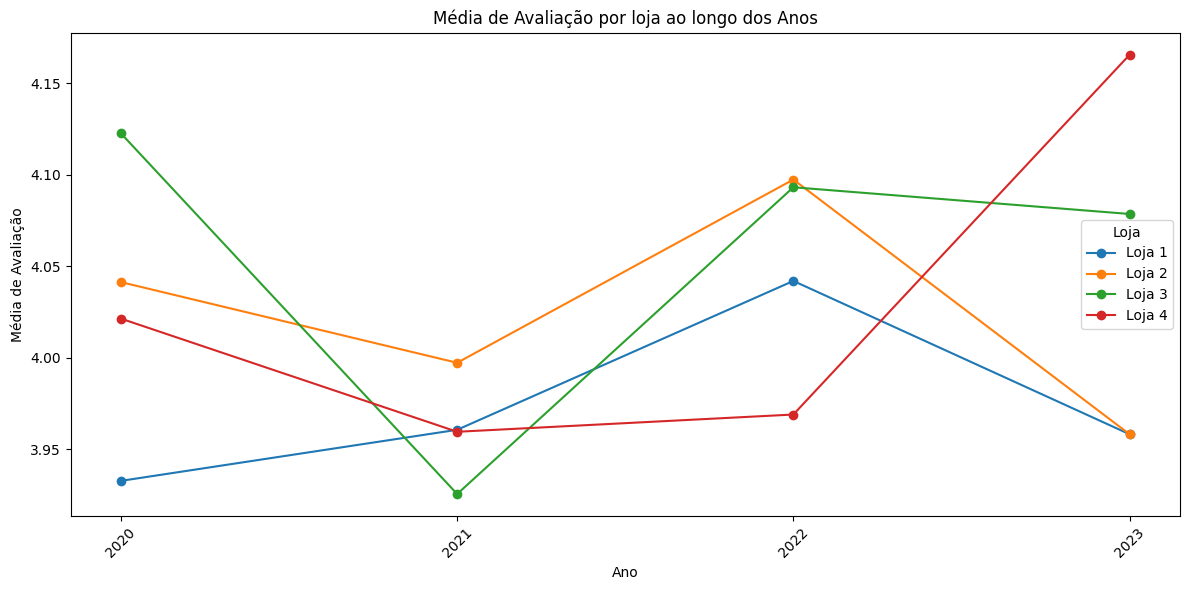

In [ ]:
from datetime import datetime
#grafico por ano

import matplotlib.pyplot as plt

#deixar os anos ordenados
avaliacao_ano["Ano"] = avaliacao_ano["Ano"].astype(int)
avaliacao_ano = avaliacao_ano.sort_values(by="Ano")

#criar o grafico

plt.figure(figsize=(12,6))

for loja in avaliacao_ano["Lojas"].unique():
    dados_loja_ano = avaliacao_ano[avaliacao_ano['Lojas']== loja]
    plt.plot(dados_loja_ano["Ano"], dados_loja_ano["Media_avaliacao"], marker='o', label=loja)

#detalhes do gráfico
plt.title("Média de Avaliação por loja ao longo dos Anos")
plt.xlabel("Ano")
plt.ylabel("Média de Avaliação")
plt.xticks(avaliacao_ano["Ano"].unique(),rotation=45)
plt.legend(title = "Loja")
plt.grid(False)
plt.tight_layout()

plt.show()



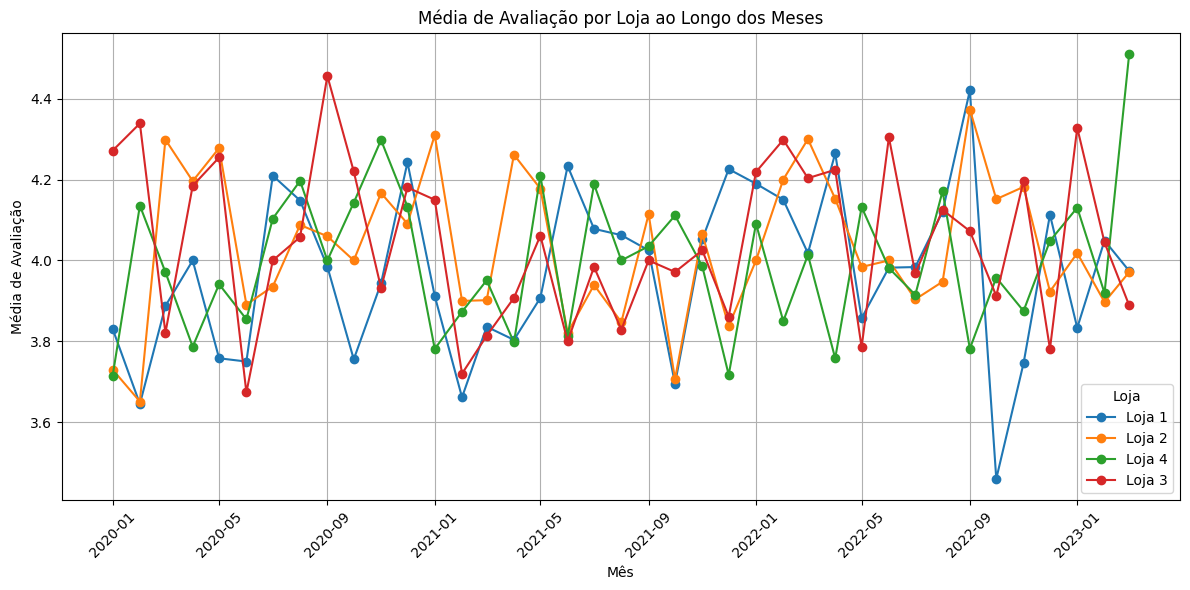

In [ ]:
import matplotlib.pyplot as plt

# Garantir que os meses estão ordenados corretamente
avaliacao["Mes"] = pd.to_datetime(avaliacao["Mes"])
avaliacao = avaliacao.sort_values(by="Mes")

# Criar a figura
plt.figure(figsize=(12, 6))

# Plotar uma linha por loja
for loja in avaliacao["Lojas"].unique():
    dados_loja = avaliacao[avaliacao["Lojas"] == loja]
    plt.plot(dados_loja["Mes"], dados_loja["Media_avaliacao"], marker='o', label=loja)

# Configurações do gráfico
plt.title("Média de Avaliação por Loja ao Longo dos Meses")
plt.xlabel("Mês")
plt.ylabel("Média de Avaliação")
plt.xticks(rotation=45)  # Gira os nomes dos meses para melhor visualização
plt.legend(title="Loja")
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja


In [ ]:
frete_medio_ano = df_completo.groupby(["loja"])["Frete"].mean().reset_index()
frete_medio_ano.columns = ["Lojas", "Media_frete"]
print(frete_medio_ano)


    Lojas  Media_frete
0  Loja 1    34.691805
1  Loja 2    33.621941
2  Loja 3    33.074464
3  Loja 4    31.278997


In [ ]:
df_completo["Data da Compra "] = pd.to_datetime(df_completo["Data da Compra	"], dayfirst = True)
df_completo["Ano"] = df_completo["Data da Compra	"].dt.year
frete_medio_ano = df_completo.groupby(["loja", "Ano"])["Frete"].mean().reset_index()
frete_medio_ano.columns = ["Lojas", "Ano", "Media_frete"]
print(frete_medio_ano)


     Lojas   Ano  Media_frete
0   Loja 1  2020    36.822490
1   Loja 1  2021    34.677159
2   Loja 1  2022    31.533739
3   Loja 1  2023    38.541206
4   Loja 2  2020    32.700568
5   Loja 2  2021    32.706667
6   Loja 2  2022    35.960806
7   Loja 2  2023    31.974736
8   Loja 3  2020    32.463548
9   Loja 3  2021    34.928842
10  Loja 3  2022    33.744173
11  Loja 3  2023    24.986982
12  Loja 4  2020    31.372439
13  Loja 4  2021    33.328736
14  Loja 4  2022    30.254287
15  Loja 4  2023    25.769277


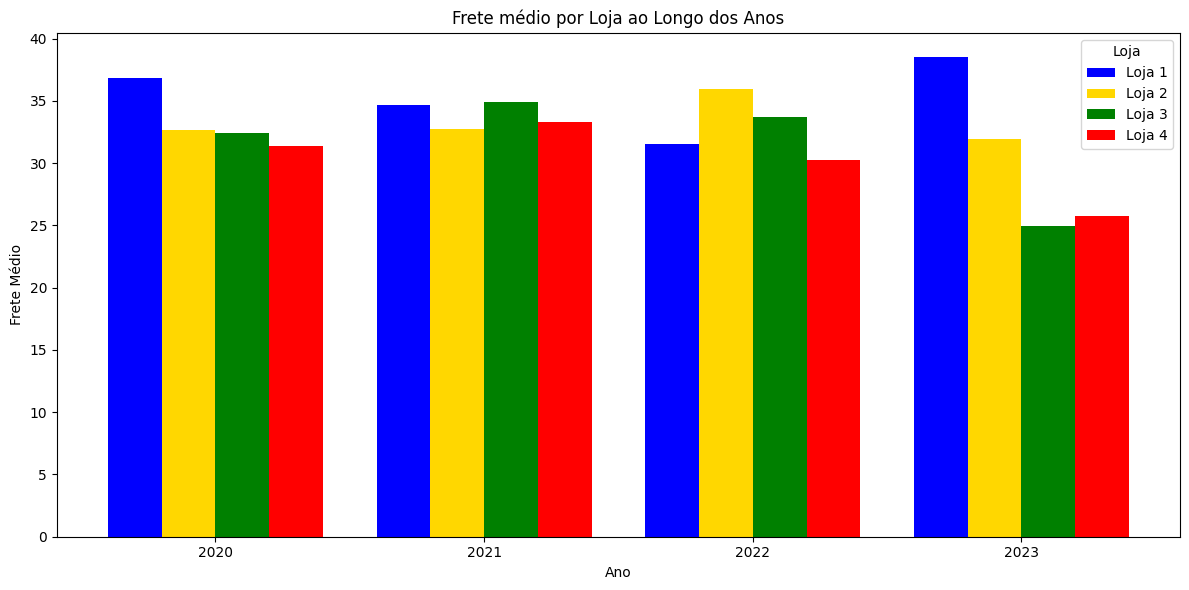

In [ ]:
frete_medio_ano["Ano"] = frete_medio_ano["Ano"].astype(int)
frete_medio_ano = frete_medio_ano.sort_values(by="Ano")

cores_lojas = {
    "Loja 1": "blue",
    "Loja 2": "gold",
    "Loja 3": "green",
    "Loja 4": "red"
}

anos = sorted(frete_medio_ano["Ano"].unique())
lojas_ordenadas = sorted(frete_medio_ano["Lojas"].unique())
largura_barra = 0.2
posicoes_base = np.arange(len(anos))

plt.figure(figsize=(12, 6))

# Para cada loja, desenhar barras deslocadas no eixo X
for i, loja in enumerate(lojas_ordenadas):
    dados_loja = frete_medio_ano[frete_medio_ano["Lojas"] == loja]


    dados_loja = dados_loja.set_index("Ano").reindex(anos, fill_value=0).reset_index()

    posicoes = posicoes_base + i * largura_barra
    cor = cores_lojas.get(loja, "gray")
    plt.bar(posicoes, dados_loja["Media_frete"], width=largura_barra, label=loja, color=cor)


plt.xticks(posicoes_base + largura_barra * (len(lojas_ordenadas)-1)/2, anos)
plt.xlabel("Ano")
plt.ylabel("Frete Médio")
plt.title("Frete médio por Loja ao Longo dos Anos")
plt.legend(title="Loja")
plt.tight_layout()
plt.grid(False)

plt.show()

# Análise final

De acordo com a avaliação média de todo o período disponibilizado, as lojas de 1 a 4 tiveram as respectivas avaliações: 3.98; 4.04; 4.05; 4.00.

As médias das avaliações tendem a mostrar que a Loja 4 é a pior entre os clientes, entretanto, quando olhamos a média ao longo dos anos é possível verificar que a Loja 4 foi a loja que teve a melhora mais significativa da satisfação dos clientes. As lojas 1 e 2 tiveram uma piora nos serviços prestados de acordo com os consumidores.

No faturamento total das lojas pode ser visto que ocorre um declínio de 2022 para 2023 de todas as lojas, a Loja 4 apresenta uma baixa de faturamento desde 2021 quando comparada com as outras lojas

Quando olhamos para o faturamento médio, a loja 3 apresenta um declínio de faturamento médio desde 2021, ultrapassando a loja 4 em 2023. Em faturamento, a Loja 2 aparenta ser a mais constante, apesar da queda de 2022 para 2023.

De forma resumida, as Lojas 1 e 2 são as que possuem maiores faturamentos totais e médios, em contrapartida, essas duas lojas possuem as piores avaliações médias dos clientes.

A categoria de produto mais vendida em todas as lojas é a de móveis. Sendo a loja 3 e 4 as que possuem as maiores quantidades de produtos vendidos para essa categoria.

Apesar da loja 4 ser a que possui a maior quantidade de vendas na categoria móveis, quando olhamos para a quantidade de vendas por ano, a loja 4 foi a que menos vendeu em 2023 como mostra o gráfico abaixo:

Ao longo dos anos a Loja 4 baixou o frete médio, em decorrência a Loja 1 teve o frete mais caro.

Apesar da loja 4 possuir a melhor evolução de avaliação e o menor frete, a loja 4 deve ser fechada, tendo em vista que possui o menor faturamento total e médio. As outras lojas vendem para a mesma região da loja 4, então iria absolver esses clientes, além disso, será necessário melhorar a qualidade das outras lojas para subir as avaliações dos clientes e aumentar o faturamento para os próximos anos.

